In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [6]:
df = pd.read_csv("..\\data\\kc_house_data.csv")
df = df.drop(['id', 'date'], axis=1)

X = df.drop('price', axis=1)
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 430302920704.0000 - mae: 540024.0000 - val_loss: 395321409536.0000 - val_mae: 532868.6875
Epoch 2/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 417576255488.0000 - mae: 537456.3125 - val_loss: 376903663616.0000 - val_mae: 520590.3125
Epoch 3/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 392613363712.0000 - mae: 518686.0938 - val_loss: 335941926912.0000 - val_mae: 491811.1875
Epoch 4/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 349030252544.0000 - mae: 484920.0625 - val_loss: 276515258368.0000 - val_mae: 445168.0000
Epoch 5/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 278641901568.0000 - mae: 434053.4688 - val_loss: 209925275648.0000 - val_mae: 382998.1875
Epoch 6/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 205472514048.0000 - mae: 368186.0938 - val_loss: 151756423168.0000 - val_mae: 314654.4688
Epoch 7/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 159569068032.0000 - mae: 304223.5625 - v

In [9]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38260445184.0000 - mae: 120108.1875
Test MAE: 117714.953125


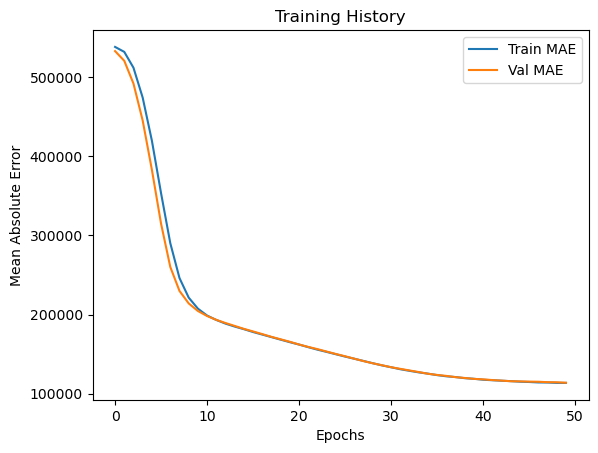

In [10]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training History")
plt.show()